# Bank Ticket Cancellation Rate Analysis
#### Case Study by Kristina Kostina  -  22/02/2019

## 1. Python settings and data import

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns; sns.set()
sns.set_context('notebook')
sns.set_style('darkgrid')
#from scipy.stats import trim_mean, kurtosis
#from scipy.stats.mstats import mode, gmean, hmean
#from sklearn.neighbors import KNeighborsClassifier

In [2]:
#read the .db files and set them to respective dataframes
cust_cnx = sqlite3.connect(r'C:\Users\kristina.kostina\Downloads\DAcasestudy\Customers.db')
cust_df = pd.read_sql_query("SELECT * FROM Customers", cust_cnx, \
                            parse_dates =['account_created_date','birthdate_date',\
                                          'first_shipped_order_date','first_placed_order_date'])
oi_cnx = sqlite3.connect(r'C:\Users\kristina.kostina\Downloads\DAcasestudy\OrderItems.db')
oi_df = pd.read_sql_query("SELECT * FROM OrderItems", oi_cnx)
orders_cnx = sqlite3.connect(r'C:\Users\kristina.kostina\Downloads\DAcasestudy\Orders.db')
orders_df = pd.read_sql_query("SELECT * FROM Orders", orders_cnx, parse_dates =['order_date','order_raw'])
products_cnx = sqlite3.connect(r'C:\Users\kristina.kostina\Downloads\DAcasestudy\Products.db')
products_df = pd.read_sql_query("SELECT * FROM Products", products_cnx, \
                                parse_dates =['collection_real_launch_date_date','product_first_order_date'])

In [3]:
#ensure that the imports worked, take a first look at the data
cust_df.head()

,user_id,account_created_date,age,gender,signup_channel,signup_device_type,signup_ip_address,signup_store_id,shipping_address_country,shipping_address_state,...,shipping_address_zip,birthdate_date,first_shipped_order_device_type,first_shipped_order_order_channel_code_online,first_shipped_order_order_retail_type_level_2,first_shipped_order_date,first_placed_order_date,first_placed_order_device_type,first_placed_order_order_channel_code_online,first_placed_order_order_retail_type_level_2
0,89256,NaT,35,,,,,0,Brasil,SP,...,01535000,1983-05-28,desktop,WEB,Online,2016-03-06,2016-03-06,desktop,WEB,Online
1,88350,NaT,44,,,,,0,Brasil,SP,...,18080709,1974-09-10,,WEB,Online,2015-09-06,2015-09-06,,WEB,Online
2,89688,NaT,57,,,,,0,Brasil,RS,...,98995000,1961-12-28,desktop,WEB,Online,2016-06-23,2016-06-23,desktop,WEB,Online
3,90364,NaT,61,,,,,0,Brasil,SP,...,16050640,1958-01-22,desktop,WEB,Online,2016-03-11,2016-03-11,desktop,WEB,Online
4,127080,NaT,34,F,,,,0,Brasil,SP,...,04542001,1984-11-22,desktop,WEB,Online,2015-12-04,2013-07-18,,-,Online


In [4]:
oi_df.head()

,order_item_id,order_id,sku,promotional_price,original_price,items_quantity,product_cost,is_item_sold_with_discount
0,328703,1594409,2195_73_0_M,257.98,351.88,1,79.53,t
1,328702,1594409,2881_147_0_M,211.03,281.46,1,102.44,t
2,328700,1594409,4097_263_0_G,175.82,234.51,1,75.10,t
3,328701,1594409,5403_1000026_0_U,117.14,117.14,1,37.54,f
4,342375,1652797,2967_1000058_0_M,174.23,348.72,1,117.15,t


In [5]:
orders_df.head()

,id,store_id,user_id,order_date,order_raw,device_type,order_channel_code_online,order_retail_type,order_status,order_source_and_device,...,is_purchase_of_new_buyer,utm_medium,utm_source,utm_campaign,shipping_paid_by_amaro,shipping_paid_by_customer,order_subtotal,order_discount,shipping_cost,order_total
0,1594409,2,82,2016-02-02,2016-02-02 17:34:30,desktop,GSL,Physical,DELIVERED,desktop web,...,Returning Buyer Purchase,(none),(direct),,34.98,0.00,761.96,0.00,34.98,324.60
1,1652797,4,82,2016-02-21,2016-02-21 17:02:24,desktop,GSL,Physical,DELIVERED,desktop web,...,Returning Buyer Purchase,organic,google,,24.68,0.00,485.31,0.00,24.68,194.70
2,1754030,1,772,2016-03-23,2016-03-23 23:13:38,desktop,WEB,Online,DELIVERED,desktop web,...,Returning Buyer Purchase,newsletter,email,,45.36,0.00,2701.98,0.00,45.36,1084.00
3,3789151,1,772,2016-04-04,2016-04-04 00:00:00,,TRO,Online,DELIVERED,millennium,...,Same Month Returning Buyers,,,,0.00,21.41,328.40,0.00,9.12,149.02
4,1582210,2,864,2016-01-29,2016-01-29 16:05:04,desktop,WEB,Online,DELIVERED,desktop web,...,Same Month Returning Buyers,organic,google,,17.47,0.00,211.38,0.00,17.47,84.80


In [6]:
products_df.head()

,sku,category_1_name,category_2_name,category_3_name,category_4_name,category_5_name,collection_real_launch_date_date,product_first_order_date,descricao_cor,familia_cor_nome
0,1003_1000038_0_GG,Feminino,Moda,Roupas,Jaquetas & Casacos,Casacos,1969-12-31,2015-06-04,CINZA,CINZA
1,1019_40130843_0_G,Feminino,Acessórios,Meia-Calça,,,2015-05-04,2015-07-30,PRETO,PRETO
2,1035_1000070_0_U,Feminino,Acessórios,Chapéus,Aba Larga,,2016-02-29,2015-05-06,BURGUNDY,VERMELHO
3,1037_1000034_0_U,Feminino,Acessórios,Chapéus,Aba Larga,,2016-05-02,2016-05-24,ROXO,ROXO
4,1037_1000038_0_U,Feminino,Acessórios,Chapéus,Aba Larga,,2016-05-02,2016-05-20,CINZA,CINZA


In [7]:
#check the dataset sizes, data types and parsing: 
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30293 entries, 0 to 30292
Data columns (total 21 columns):
user_id                                          30293 non-null object
account_created_date                             29668 non-null datetime64[ns]
age                                              30293 non-null object
gender                                           30293 non-null object
signup_channel                                   30293 non-null object
signup_device_type                               30293 non-null object
signup_ip_address                                30293 non-null object
signup_store_id                                  30293 non-null object
shipping_address_country                         30293 non-null object
shipping_address_state                           30293 non-null object
shipping_address_city                            30293 non-null object
shipping_address_zip                             30293 non-null object
birthdate_date                 

In [8]:
oi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136774 entries, 0 to 136773
Data columns (total 8 columns):
order_item_id                 136774 non-null object
order_id                      136774 non-null object
sku                           136774 non-null object
promotional_price             136774 non-null object
original_price                136774 non-null object
items_quantity                136774 non-null object
product_cost                  136774 non-null object
is_item_sold_with_discount    136774 non-null object
dtypes: object(8)
memory usage: 8.3+ MB


In [9]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61499 entries, 0 to 61498
Data columns (total 34 columns):
id                                  61499 non-null object
store_id                            61499 non-null object
user_id                             61499 non-null object
order_date                          61499 non-null datetime64[ns]
order_raw                           61499 non-null datetime64[ns]
device_type                         61499 non-null object
order_channel_code_online           61499 non-null object
order_retail_type                   61499 non-null object
order_status                        61499 non-null object
order_source_and_device             61499 non-null object
payment_method                      61499 non-null object
payment_num_installments            61499 non-null object
payment_coupon                      61499 non-null object
shipping_method_id                  61499 non-null object
address_city                        61499 non-null object
addre

In [10]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10482 entries, 0 to 10481
Data columns (total 10 columns):
sku                                 10482 non-null object
category_1_name                     10482 non-null object
category_2_name                     10482 non-null object
category_3_name                     10482 non-null object
category_4_name                     10482 non-null object
category_5_name                     10482 non-null object
collection_real_launch_date_date    10482 non-null datetime64[ns]
product_first_order_date            10482 non-null datetime64[ns]
descricao_cor                       10482 non-null object
familia_cor_nome                    10482 non-null object
dtypes: datetime64[ns](2), object(8)
memory usage: 819.0+ KB


After taking the first look at the imported data, I realized that the columns that contain numerical data and dates weren't actually parsed as such (despite the fact that the default of **coerce_float** parameter in **read_sql_query** is set to True). It was after that that I've 1) included the **parse_dates** parameter into the function above 2) coerced the floats here:

In [56]:
cust_df.age=pd.to_numeric(cust_df.age)
orders_df.payment_num_installments=pd.to_numeric(orders_df.payment_num_installments)
orders_df.days_until_next_placed_order=pd.to_numeric(orders_df.days_until_next_placed_order)
orders_df.shipping_paid_by_amaro=pd.to_numeric(orders_df.shipping_paid_by_amaro)
orders_df.shipping_paid_by_customer=pd.to_numeric(orders_df.shipping_paid_by_customer)
orders_df.order_subtotal=pd.to_numeric(orders_df.order_subtotal)
orders_df.order_discount=pd.to_numeric(orders_df.order_discount)
orders_df.shipping_cost=pd.to_numeric(orders_df.shipping_cost)
orders_df.order_total=pd.to_numeric(orders_df.order_total)

## 2. Data cleaning and assumptions

Let's take a look at the data to see the potential for data cleaning. We will start with Orders as the fact table of the set.

In [57]:
#basic descriptive statistics of the Orders dataset
orders_df.describe(include='all').transpose()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,61499,61499,2149381,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,61499,10,1,50741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,61499,30302,28,2944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,61499,183,2016-06-09 00:00:00,795,2016-01-01 00:00:00,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_raw,61499,51319,2016-05-18 00:00:00,116,2016-01-01 01:52:03,2016-07-01 23:32:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_type,61499,4,desktop,39038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_channel_code_online,61499,11,WEB,44839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_retail_type,61499,3,Online,50887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,61499,6,DELIVERED,46879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_source_and_device,61499,5,desktop web,39038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Orders data contains 61499 orders (data quality check - all orders have unique ids) of 30302 unique customers, in the period of January through June 2016. (The data on July will be ignored since we only have the observations of one day in that month, very likely added to the dataset in question by mistake).

At the first glance, data does look as if it might have some outliers. For instance, maximum *order subtotal* - 30685, doesn't look very realistic, neither does the maximum *order total* of 13072 or *order discount* of 8929. To check the data for outliers, I will build a box and whiskers plot.

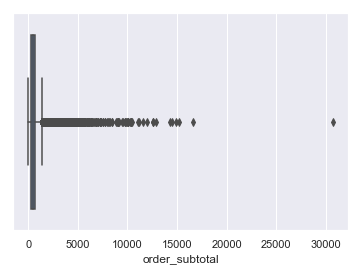

In [13]:
sns.boxplot(orders_df.order_subtotal)

There are quite a few observations lying outside the Q3 + 1.5 interquartile range on the right-hand side of the dataset (represented by the end of the error bar in the default Boxplot in Seaborn - Tukey boxplot). 
Starting from around 14 000 there are outliers, and within that there lie suspected outliers.
First, let's try to exclude them all:

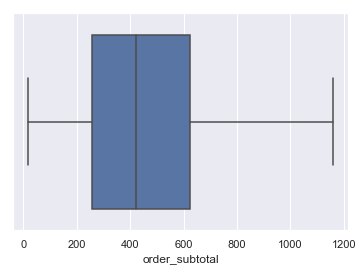

In [14]:
#after a couple of tests, I arrived to the approximate end of the 1.5 IQR:
sns.boxplot(orders_df[orders_df.order_subtotal<1160].order_subtotal)

In [15]:
#see the values of orders_total at different quantiles:
orders_df.order_subtotal.quantile([0.25,0.5,0.75,0.9,0.999])

0.250     273.94000
0.500     445.77000
0.750     703.75000
0.900    1149.52000
0.999    6288.09198
Name: order_subtotal, dtype: float64

In [16]:
#However, let's see how many of orders might potentially be classified as outliers if we follow the 1.5 IQR logic?
orders_df[orders_df.order_subtotal>=1200].order_subtotal.count()

5625

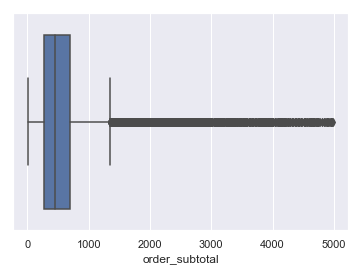

In [17]:
#That's a big share of all observations. Let's take a look at the boxplot while including more observations:
g = sns.boxplot(orders_df[orders_df.order_subtotal<5000].order_subtotal)

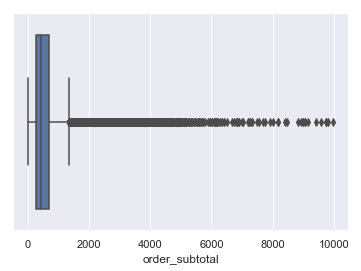

In [18]:
sns.boxplot(orders_df[orders_df.order_subtotal<10000].order_subtotal)

It looks like the orders below 5000 still can't be treated as outliers.

In [19]:
orders_df[orders_df.order_subtotal>=10000].user_id.value_counts().head()

32725308    11
32980622     2
32933716     1
14300118     1
32930026     1
Name: user_id, dtype: int64

In [20]:
orders_df[orders_df.order_subtotal>=3000].user_id.value_counts().head()

32725308    47
32718280     7
32736602     7
87696        5
32704908     5
Name: user_id, dtype: int64

The majority of 'exceptional' purchases continue to belong to just one particular customer. After taking a look at his data in Orders and Customers tables

In [21]:
orders_df[orders_df.user_id=='32725308'].groupby('order_status').payment_method.value_counts()

order_status  payment_method
CANCELLED     Boleto            68
DELIVERED     Cartão             2
Name: payment_method, dtype: int64

In [55]:
#out of all purchases of this customer, most were cancelled and were passed via Boleto!\
#this kind of customer certainly would skew our data when analyzing the Boleto cancellation rate. \
#Let's explore more details of his/her purchases
noia_df=pd.merge(orders_df[orders_df.user_id=='32725308'],oi_df,left_on='id',right_on='order_id')
noia_df.sku.value_counts()

4399_275_0_44         19
959_1000012_0_44      17
6495_1000108_0_42     15
5923_83_0_G           15
5199_40130843_0_42    14
5217_40130843_0_42    14
6243_1000070_0_42     13
6487_40130843_0_42    13
5207_1000032_0_42     13
5923_40130843_0_G     12
6495_40130843_0_42    12
2317_1000024_0_G      11
2791_1000022_0_44     11
5223_1000032_0_42      9
5211_40130843_0_42     9
959_83_0_42            8
3819_1000094_0_44      8
5257_40130843_0_42     8
3819_233_0_44          8
4401_275_0_G           8
4079_1000058_0_42      8
4079_1000058_0_40      7
6493_385_0_42          7
959_1000032_0_42       7
4467_1000030_0_G       7
3769_1000058_0_42      7
6493_135_0_42          6
6455_383_0_42          6
2911_141_0_G           6
2221_1000010_0_44      6
                      ..
6483_313_0_44          1
7001_161_0_44          1
4109_1000058_0_G       1
3657_1000022_0_42      1
6447_1000046_0_42      1
6955_173_0_G           1
5531_267_0_G           1
5175_175_0_44          1
1737_40130843_0_G      1


It appears rather suspectful that, first, many *sku*s appear in several orders, second, that the sizes vary from M to GG. This appears as an attempt of fraud. Further investigation might be needed. For now, let's exclude this customer from the analysis to avoid the skew in the data.

### 2.1. Payment Methods

In this Case Study, we need to analyze the cancellation rate of the orders for which payment method is 'Boleto'.
Let's first see what payments methods look like in the Orders table:

In [54]:
#check payment methods and their occurencies:
orders_df.payment_method.value_counts()

Cartão                  31867
Boleto                  16576
Devolução Troca          3834
Créditos Troca           1406
N/A                      1403
Débito                   1094
Rede-Credito A Vista     1086
Visa A Vista              577
Maestro A Vista           574
Cortesia                  549
Electron A Vista          509
Pós-Pago                  466
Mastercard A Vista        443
Visa Credito              236
Mastercard Credito        235
Mastercard Boleto          81
Elo Debito A Vista         66
Rede-Credito 2X            61
Amex A Vista               49
Rede-Credito 3X            45
Mastercard 2X              45
Créditos Amaro             35
Visa 2X                    32
Mastercard 3X              31
Rede-Credito 4X            25
Visa 3X                    21
Amex Credito               17
Rede-Credito 5X            16
Rede-Credito 6X            16
Mastercard 6X              15
Diners A Vista             10
Visa 4X                     8
Visa 6X                     8
Mastercard

'Boleto' and 'BOLETO' appear as if they were two different payment methods. Maybe they aren't recorded properly in one of the devices / order channels. But this isn't important for this analysis, where we can assume it's the same payment method.

In [53]:
#join together the capitalizations 'BOLETO' into 'Boleto', rewrite directly in the 'payment_method' column:
orders_df.payment_method=orders_df.payment_method.apply(lambda x: x.title())
#check:
orders_df.payment_method.value_counts().head(15)

Cartão                  31867
Boleto                  16576
Devolução Troca          3834
Créditos Troca           1406
N/A                      1403
Débito                   1094
Rede-Credito A Vista     1086
Visa A Vista              577
Maestro A Vista           574
Cortesia                  549
Electron A Vista          509
Pós-Pago                  466
Mastercard A Vista        443
Visa Credito              236
Mastercard Credito        235
Name: payment_method, dtype: int64

### 2.2 Order Status
According to the task, the two flags *is_placed_order* and *is_shipped order* should be reflected in *order status*. Let's check whether it's reflected properly:

In [51]:
#see the counts of all possible combinations and their occurencies:
orders_df.groupby(['order_status','is_placed_order'])['is_shipped_order'].value_counts()

order_status                   is_placed_order  is_shipped_order
AWAITING PAYMENT CONFIRMATION  t                f                      13
BILLED / READY TO BE SHIPPED   f                f                      91
                               t                t                     534
CANCELLED                      f                f                     640
                               t                f                   10110
DELIVERED                      f                f                    4199
                               t                t                   42680
PAYMENT CONFIRMED              f                f                       2
SHIPPED                        f                f                      76
                               t                t                    3154
Name: is_shipped_order, dtype: int64

It's clear that not all combinations of flags *is_placed_order* and *is_shipped_order* reflect exactly what's described in the task. In particular, there are 4199 orders that have the status **delivered**, but weren't neither placed not shipped (**f - f**). Also, there are 640 orders that were cancelled but appear as **f - f** and not **t - f**. Since both cases represent a rather large fraction of all delivered and cancelled orders respectively, they need to be analised further to avoid a potential bias in the analysis.

In [52]:
#fetch description of data that falls out of the indicated order:
orders_df[(orders_df.order_status=='CANCELLED')&(orders_df.is_placed_order=='f')&(orders_df.is_shipped_order=='f')].describe(exclude='number').transpose()

,count,unique,top,freq,first,last
id,640,640,3502249,1,NaN,NaN
store_id,640,1,1,640,NaN,NaN
user_id,640,563,32866266,5,NaN,NaN
order_date,640,139,2016-05-11 00:00:00,11,2016-01-04 00:00:00,2016-07-01 00:00:00
order_raw,640,139,2016-05-11 00:00:00,11,2016-01-04 00:00:00,2016-07-01 00:00:00
device_type,640,1,,640,NaN,NaN
order_channel_code_online,640,5,TRO,620,NaN,NaN
order_retail_type,640,1,Online,640,NaN,NaN
order_status,640,1,CANCELLED,640,NaN,NaN
order_source_and_device,640,1,millennium,640,NaN,NaN


Out of 640 cases under consideration, 565 don't have the payment_method (**N/A**), 620 have the *order_channel_code_online* **TRO**. My guess is that we're dealing with Cancelled orders that were actually not new orders, but Exchanges (Troca). Let's see what other orders with *order_channel_code_online* **TRO** look like:

In [27]:
orders_df[(orders_df.order_channel_code_online=='TRO')].payment_method.value_counts()

Devolução Troca    3803
N/A                 548
Boleto               13
Cortesia             12
Name: payment_method, dtype: int64

Indeed, the majority of **TRO** orders fall into category **Devolução Troca** in *payment_method*. I will assume that we're dealing with orders that were supposed to make part of the 'Returns and Exchanges' category but for some reason weren't labelled as such. To confirm, let's see the order status that have the payment method of **Devolução Troca** and are tagged as **f - f**.

In [28]:
orders_df[(orders_df.payment_method=='Devolução Troca')&(orders_df.is_placed_order=='f')&(orders_df.is_shipped_order=='f')].order_status.value_counts()

DELIVERED    3746
CANCELLED      63
Name: order_status, dtype: int64

It appears that the orders with the payment method **Devolução Troca** are registered separately from the initial order that is being exchanged, otherwise, it wouldn't make sense to flag it with **f - f** in plaing and shipping. Therefore, it might make sense to exclude these orders from our analysis, given that they don't affect the KPIs of the task - GMV and Revenue. 

In [58]:
#these 640 orders appear to not have been placed at all, therefore there has been a cancellation at some other point, or there is a mistake in data. Let's explore these further
orders_df[(orders_df.order_status=='CANCELLED')&(orders_df.is_placed_order=='f')&(orders_df.is_shipped_order=='f')]

,id,store_id,user_id,order_date,order_raw,device_type,order_channel_code_online,order_retail_type,order_status,order_source_and_device,...,shipping_paid_by_amaro,shipping_paid_by_customer,order_subtotal,order_discount,shipping_cost,order_total,gmv,revenue,payment_method_b,rn
2464,3496793,1,108668,2016-02-17,2016-02-17,,TRO,Online,CANCELLED,millennium,...,0.0,22.73,198.91,0.00,9.12,88.92,NaN,NaN,False,3.0
1159,3483989,1,109084,2016-01-12,2016-01-12,,TRO,Online,CANCELLED,millennium,...,0.0,21.41,164.09,0.00,9.12,79.02,NaN,NaN,False,2.0
14600,3788051,1,11349342,2016-04-05,2016-04-05,,TRO,Online,CANCELLED,millennium,...,0.0,18.64,149.31,0.00,7.48,67.38,NaN,NaN,False,1.0
14612,3819775,1,11352652,2016-07-01,2016-07-01,,TRO,Online,CANCELLED,millennium,...,0.0,27.57,398.57,0.00,11.06,170.96,NaN,NaN,False,17.0
2590,3506220,1,116310,2016-03-04,2016-03-04,,TRO,Online,CANCELLED,millennium,...,0.0,53.50,398.83,117.37,22.79,142.69,NaN,NaN,False,2.0
14650,3512116,1,12457258,2016-03-30,2016-03-30,,TRO,Online,CANCELLED,millennium,...,0.0,44.09,668.30,0.00,18.78,303.48,NaN,NaN,False,2.0
10790,3817300,1,1255982,2016-05-02,2016-05-02,,TRO,Online,CANCELLED,millennium,...,0.0,34.70,222.54,0.00,14.78,109.58,NaN,NaN,False,2.0
1366,3524975,1,127080,2016-06-14,2016-06-14,,MKT,Online,CANCELLED,millennium,...,0.0,0.00,146.71,0.00,0.00,62.50,NaN,NaN,False,9.0
14707,3513084,1,12790562,2016-03-07,2016-03-07,,TRO,Online,CANCELLED,millennium,...,0.0,37.14,373.40,0.00,14.90,164.70,NaN,NaN,False,2.0
2807,3793870,1,129262,2016-04-20,2016-04-20,,TRO,Online,CANCELLED,millennium,...,0.0,36.12,703.75,0.00,15.39,315.19,NaN,NaN,False,4.0


### 2.3. AMARO Revenue KPIs

In [59]:
#calculate GMV and add it as a new field. GMV = the sum of the column order_total when is_placed_order is true
orders_df['gmv']=orders_df[orders_df.is_placed_order=='t'].order_total

In [60]:
#calculate revenue = sum of the column order_total when is_shipped_order = true
orders_df['revenue']=orders_df[orders_df.is_shipped_order=='t'].order_total
orders_df

,id,store_id,user_id,order_date,order_raw,device_type,order_channel_code_online,order_retail_type,order_status,order_source_and_device,...,shipping_paid_by_amaro,shipping_paid_by_customer,order_subtotal,order_discount,shipping_cost,order_total,gmv,revenue,payment_method_b,rn
2282,1592935,1,100264,2016-02-02,2016-02-02 12:31:18,desktop,WEB,Online,DELIVERED,desktop web,...,0.00,34.50,234.27,0.00,14.70,114.50,114.50,114.50,False,1.0
12770,1810757,1,1003284,2016-04-11,2016-04-11 17:27:55,desktop,WEB,Online,DELIVERED,desktop web,...,0.00,83.22,2715.19,0.00,33.39,1122.69,1122.69,1122.69,False,1.0
12771,3791923,1,1003284,2016-04-15,2016-04-15 00:00:00,,TRO,Online,DELIVERED,millennium,...,0.00,67.88,896.84,0.00,27.23,387.03,NaN,NaN,False,2.0
11576,1584091,1,10035802,2016-01-30,2016-01-30 16:09:04,desktop,WEB,Online,CANCELLED,desktop web,...,0.00,17.56,281.46,0.00,7.48,127.38,127.38,NaN,True,1.0
11573,1584124,1,10035802,2016-01-30,2016-01-30 16:24:16,desktop,WEB,Online,DELIVERED,desktop web,...,0.00,17.56,281.46,0.00,7.48,127.38,127.38,127.38,False,2.0
11574,1683883,1,10035802,2016-02-29,2016-02-29 09:07:54,desktop,WEB,Online,DELIVERED,desktop web,...,0.00,22.45,373.40,0.00,9.01,158.81,158.81,158.81,True,3.0
11575,1686501,1,10035802,2016-02-29,2016-02-29 16:59:00,desktop,WEB,Online,CANCELLED,desktop web,...,24.68,0.00,622.66,0.00,24.68,249.80,249.80,NaN,True,4.0
14493,1522579,1,10040234,2016-01-06,2016-01-06 17:22:34,desktop,WEB,Online,CANCELLED,desktop web,...,0.00,21.41,281.46,0.00,9.12,129.02,129.02,NaN,True,1.0
2283,1728686,1,100420,2016-03-14,2016-03-14 20:53:53,desktop,WEB,Online,DELIVERED,desktop web,...,31.26,0.00,469.01,0.00,31.26,199.80,199.80,199.80,False,1.0
2284,1641621,1,100498,2016-02-19,2016-02-19 12:05:31,desktop,WEB,Online,DELIVERED,desktop web,...,0.00,15.36,211.12,0.00,6.16,90.86,90.86,90.86,False,1.0


### 2.3. Other useful fields

In [61]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61499 entries, 2282 to 2280
Data columns (total 38 columns):
id                                  61499 non-null object
store_id                            61499 non-null object
user_id                             61499 non-null object
order_date                          61499 non-null datetime64[ns]
order_raw                           61499 non-null datetime64[ns]
device_type                         61499 non-null object
order_channel_code_online           61499 non-null object
order_retail_type                   61499 non-null object
order_status                        61499 non-null object
order_source_and_device             61499 non-null object
payment_method                      61499 non-null object
payment_num_installments            61499 non-null int64
payment_coupon                      61499 non-null object
shipping_method_id                  61499 non-null object
address_city                        61499 non-null object
addr

In [64]:
#In order to always be able to separate the purchases paid with bank tickets from all others, let's create a boolean field:
orders_df['payment_method_b']=np.where(orders_df['payment_method']=="Boleto",True,False)

In [62]:
#also, it might be helpful to have all Orders rank ordered for each customer. I'll do this with a window function:
orders_df=(orders_df.assign(rn=orders_df.groupby(['user_id'])['order_raw'].rank(method='first', ascending=True))).sort_values(['user_id','rn'])

In [63]:
#let's create a multiindex based on user_id and the rank order of each order to facilitate future indexing:
orders_df_new=orders_df.reset_index(drop=True).set_index(['user_id','rn'])
orders_df_new

id store_id order_date           order_raw device_type  \
user_id  rn                                                                 
100264   1.0  1592935        1 2016-02-02 2016-02-02 12:31:18     desktop   
1003284  1.0  1810757        1 2016-04-11 2016-04-11 17:27:55     desktop   
         2.0  3791923        1 2016-04-15 2016-04-15 00:00:00               
10035802 1.0  1584091        1 2016-01-30 2016-01-30 16:09:04     desktop   
         2.0  1584124        1 2016-01-30 2016-01-30 16:24:16     desktop   
         3.0  1683883        1 2016-02-29 2016-02-29 09:07:54     desktop   
         4.0  1686501        1 2016-02-29 2016-02-29 16:59:00     desktop   
10040234 1.0  1522579        1 2016-01-06 2016-01-06 17:22:34     desktop   
100420   1.0  1728686        1 2016-03-14 2016-03-14 20:53:53     desktop   
100498   1.0  1641621        1 2016-02-19 2016-02-19 12:05:31     desktop   
         2.0  1933286        1 2016-05-09 2016-05-09 17:31:32     desktop   
101174   1.0  1561629        4 2016-01-22 2016-01-22 14:56:43     desktop   
         2.0  1711592        1 2016-03-09 2016-03-09 08:16:32     desktop   
         3.0  1764810        1 2016-03-29 2016-03-29 11:39:34     desktop   
101250   1.0  1580615        1 2016-01-29 2016-01-29 09:42:30     desktop   
         2.0  1594079        1 2016-02-02 2016-02-02 16:18:50     desktop   
101514   1.0  2011606        1 2016-05-27 2016-05-27 02:14:01      mobile   
10160562 1.0  2160513        1 2016-06-22 2016-06-22 14:13:26     desktop   
         2.0  3531135        1 2016-06-27 2016-06-27 00:00:00               
101654   1.0  1701989        1 2016-03-05 2016-03-05 00:22:57     desktop   
         2.0  1704101        1 2016-03-06 2016-03-06 11:13:14     desktop   
         3.0  1706378        1 2016-03-07 2016-03-07 11:41:56     desktop   
101736   1.0  1544733        1 2016-01-15 2016-01-15 17:02:52     desktop   
         2.0  3487454        1 2016-01-25 2016-01-25 00:00:00               
         3.0  2041966        1 2016-06-01 2016-06-01 12:16:57     desktop   
10176768 1.0  1663797        1 2016-02-23 2016-02-23 15:50:47     desktop   
10183116 1.0  1525186        1 2016-01-07 2016-01-07 17:15:41     desktop   
         2.0  1529014        1 2016-01-09 2016-01-09 11:37:13     desktop   
         3.0  2015412        1 2016-05-27 2016-05-27 17:32:47     desktop   
101860   1.0  1650795        1 2016-02-21 2016-02-21 06:32:43     desktop   
...               ...      ...        ...                 ...         ...   
9754336  1.0  1990772        2 2016-05-22 2016-05-22 16:54:05     desktop   
97548    1.0  1727641        1 2016-03-14 2016-03-14 15:06:15     desktop   
97808    1.0  2073701        1 2016-06-07 2016-06-07 17:02:39     desktop   
98314    1.0  1553302        1 2016-01-19 2016-01-19 17:13:21     desktop   
98344    1.0  1684499        1 2016-02-29 2016-02-29 11:00:48     desktop   
98658    1.0  1785138        1 2016-04-05 2016-04-05 11:18:15     desktop   
98700    1.0  1872995        1 2016-04-25 2016-04-25 13:51:21     desktop   
         2.0  2186110        1 2016-06-29 2016-06-29 08:11:51     desktop   
98896    1.0  2007272        1 2016-05-26 2016-05-26 12:51:33     desktop   
99408    1.0  1597863        1 2016-02-03 2016-02-03 15:00:24     desktop   
         2.0  1604221        8 2016-02-05 2016-02-05 11:14:06     desktop   
99478    1.0  1846397        1 2016-04-19 2016-04-19 10:09:48     desktop   
9951752  1.0  1586104        1 2016-01-31 2016-01-31 15:36:52     desktop   
         2.0  1586731        1 2016-01-31 2016-01-31 20:43:00     desktop   
99552    1.0  1674236        1 2016-02-25 2016-02-25 23:25:20     desktop   
99784    1.0  1933308        1 2016-05-09 2016-05-09 17:32:55     desktop   
9982376  1.0  1661630        1 2016-02-23 2016-02-23 10:31:34      mobile   
99826    1.0  1960709        1 2016-05-15 2016-05-15 14:21:25     desktop   
99840    1.0  1776327        1 2016-04-02 2016-04-02 17:52:54     desktop   
99852    1.0  1

## 3. Data Analysis
### 3.1 Cancellation rate dynamics

There are two approaches to calculation of cancellation rate: customer-based and orders-based. The most common one is customer-based: cancellation rate as a percentage of customers who cancel in any given month compared to total (paying) customers.
However, since we're dealing with a situation where each customer can have both delivered and cancelled orders within each given month, we'd rather apply the orders approach.
Therefore, here we calculate the cancellation rate based on orders themselves: percentage of cancelled orders in any given month compared to total orders.

In [65]:
#orders_df.groupby('order_status'). Last month (July) dropped to avoid confusion.
orders_df_new['order_month']=orders_df_new.order_date.map(lambda x: x.strftime('%m'))
cancel_rate=orders_df_new.groupby('order_month').order_status.value_counts(normalize=True).unstack().transpose().loc['CANCELLED'][:-1]
cancel_rate

order_month
01    0.194904
02    0.196328
03    0.167404
04    0.172295
05    0.169692
06    0.161199
Name: CANCELLED, dtype: float64

In [157]:
#let's see the cancellation rate of boletos. Last month (July) dropped.
cancel_rate_b=orders_df_new[orders_df_new.payment_method_b==True].groupby('order_month').order_status.value_counts(normalize=True).unstack().transpose().loc['CANCELLED'][:-1]
cancel_rate_b

order_month
01    0.552859
02    0.565322
03    0.544367
04    0.524042
05    0.528662
06    0.518187
Name: CANCELLED, dtype: float64

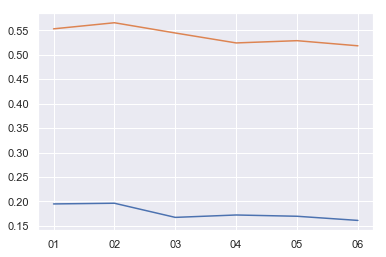

In [38]:
sns.lineplot(markers=True, data=cancel_rate, legend="full")
sns.lineplot(markers=True, data=cancel_rate_b, legend="full")

Cancellation rate for bank tickets is significantly higher than the average of all orders. It's also possible to spot a tendency to decrease in both curves.

order_month
01    0.271489
02    0.307864
03    0.253635
04    0.286352
05    0.257941
06    0.249498
Name: Boleto, dtype: float64

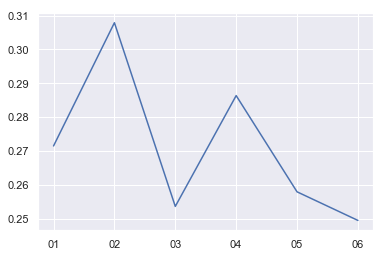

In [155]:
boleto_share=orders_df_new.groupby('order_month').payment_method.value_counts(normalize=True).unstack().transpose().loc['Boleto'][:-1]
sns.lineplot(markers=True, data=boleto_share, legend="full")
boleto_share

During the period Jan-Jul 2016, bank ticket was a chosen method of payment in ~27% of cases, with its share slightly fluctuating across months.

payment_method_b,False,True
order_month,,
01,948902.00,387465.45
02,1145228.46,523733.30
03,1236361.10,511558.30
04,1620667.35,669396.93
05,2297431.71,840997.57
06,2524865.46,931373.64


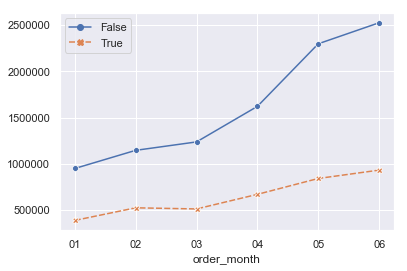

In [153]:
#Dynamics of GMV from different payment methods
gmv_dyn=orders_df_new.groupby(['order_month','payment_method_b']).sum().unstack().gmv[:-1]
sns.lineplot(markers=True, data=gmv_dyn, legend="full")
gmv_dyn

We can see that bank tickets payments represent a rather large share in GMV. Also, it's important to see that the growth of GMV from bank tickets doesn't keep up with the growth of GMV across all other payment methods, resulting in an increasing gap between such.

In [190]:
cancel_rate_all=orders_df_new.groupby(['order_month','order_status']).payment_method.value_counts(normalize=True).unstack()[:-1].xs('CANCELLED', level='order_status')
#sns.lineplot(markers=True, data=cancel_rate_all, legend="full")
cancel_rate_all[:-1].transpose()

order_month,01,02,03,04,05,06
payment_method,,,,,,
Amex 2X,NaN,NaN,NaN,NaN,NaN,NaN
Amex 4X,NaN,NaN,NaN,NaN,NaN,NaN
Amex 5X,NaN,NaN,NaN,NaN,NaN,NaN
Amex 6X,NaN,NaN,NaN,NaN,NaN,NaN
Amex A Vista,NaN,NaN,NaN,NaN,NaN,NaN
Amex Credito,NaN,NaN,NaN,NaN,NaN,NaN
Boleto,0.770098,0.886486,0.824773,0.870950,0.803596,0.802030
Cartão,0.132983,0.038919,0.021903,0.024838,0.028585,0.039686
Cortesia,NaN,NaN,NaN,NaN,NaN,NaN


Out of all cancellations, bank tickets represented about 80% in all month in the analyzed period. 
All of these time series demonstrate the importance of analyzing the cancellation rate of orders paid by bank tickets.

## Hypothesis 1
### the customers that pay with bank tickets are always the same ones

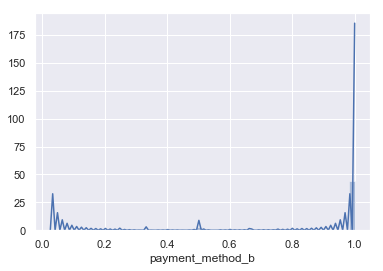

In [67]:
#for each user, let's see 1)with which frequency they use either bank ticket or any other payment method, 
#2)then do a reverse grouping, seeing which percentage of bank ticket usage is most common
grouped_b = orders_df.groupby(['user_id']).payment_method_b.value_counts(normalize=True)
sns.distplot(grouped_b)

In [44]:
#orders_df.groupby(['user_id']).payment_method_b.value_counts(normalize=True).value_counts(normalize=True).head(10)
orders_df.groupby(['user_id']).payment_method_b.value_counts(normalize=True).value_counts(bins=2)

(0.513, 1.0]      29375
(0.024, 0.513]     3315
Name: payment_method_b, dtype: int64

In [45]:
#test
testst=orders_df.groupby(['user_id']).payment_method_b.value_counts().unstack()
testst[0][28]

1.0

In [46]:
We can see that indeed the majority of users go for either one or the other method of payment, with only 6% of users paying half/half. Further it would be interesting to explore whether these or other categories of users first try pay a boleto and then discover it didn't work 

SyntaxError: invalid syntax (<ipython-input-46-1bbf0a45df15>, line 1)

## Hypothesis 2
### the customers that choose bank tickets as a payment method and don't pay them are always the same ones

In [109]:
grouped_bc = orders_df[orders_df.payment_method_b==True].groupby(['user_id']).order_status.value_counts(normalize=True)
#sns.distplot(tuple(grouped_bc))

In [110]:
grouped_bc = orders_df[orders_df.payment_method_b==True].groupby(['user_id']).order_status.value_counts(normalize=True).unstack()
grouped_bc.CANCELLED.value_counts(bins=4, normalize=True)

(0.759, 1.0]       0.415652
(0.277, 0.518]     0.095613
(0.518, 0.759]     0.034925
(0.0337, 0.277]    0.009701
Name: CANCELLED, dtype: float64

In [113]:
orders_df[orders_df.payment_method_b==True].groupby(['user_id']).order_status.value_counts(normalize = True).value_counts(normalize = True).head(15)

1.000000    0.738524
0.500000    0.125539
0.333333    0.031478
0.666667    0.031385
0.750000    0.010212
0.250000    0.010212
0.600000    0.005902
0.400000    0.005902
0.800000    0.004591
0.200000    0.004591
0.166667    0.001780
0.833333    0.001780
0.285714    0.001405
0.571429    0.001405
0.428571    0.001405
Name: order_status, dtype: float64

Most of 'boleto' purchases are either successful or not for the same customer, given that we can probably compare the properties of those customers who regularly pay well with those who don't, to see how we can hypothetically move more customers from the group of non-payers to the group of payers.  

## Hypothesis 3
Customers whose first placed order was bank ticket never come back more frequently as opposed to customers whose first placed order was any other payment method.

In [47]:
orders_df_new.xs(1,level='rn').groupby('order_status').payment_method_b.value_counts().unstack()

payment_method_b,False,True
order_status,,
AWAITING PAYMENT CONFIRMATION,6.0,NaN
BILLED / READY TO BE SHIPPED,96.0,NaN
CANCELLED,419.0,4367.0
DELIVERED,20861.0,4084.0
SHIPPED,468.0,1.0


In [48]:
orders_df_new.groupby('order_status').payment_method_b.value_counts().unstack()

payment_method_b,False,True
order_status,,
AWAITING PAYMENT CONFIRMATION,11.0,2.0
BILLED / READY TO BE SHIPPED,625.0,NaN
CANCELLED,1861.0,8889.0
DELIVERED,39197.0,7682.0
PAYMENT CONFIRMED,2.0,NaN
SHIPPED,3227.0,3.0


In [132]:
#select all users whose first placed orders that were cancelled
users_1canc=list(orders_df_new.xs(1,level='rn')[orders_df_new.xs(1,level='rn').order_status=='CANCELLED'].index.values)
users_1canc

['10035802',
 '10040234',
 '101250',
 '101654',
 '10218584',
 '10246674',
 '102514',
 '1027450',
 '10306',
 '10342',
 '103474',
 '103610',
 '104754',
 '105118',
 '105128',
 '105384',
 '10550114',
 '10593462',
 '106020',
 '10697114',
 '1069712',
 '10710144',
 '107138',
 '10741360',
 '107652',
 '10772242',
 '10778916',
 '10785208',
 '107946',
 '108198',
 '108454',
 '109446',
 '10963524',
 '10988290',
 '110056',
 '11074648',
 '11118240',
 '112110',
 '11214256',
 '11250512',
 '112652',
 '11280956',
 '1129482',
 '11349342',
 '1135046',
 '113818',
 '113858',
 '1141530',
 '114158',
 '114938',
 '115882',
 '1168310',
 '116846',
 '117082',
 '117124',
 '117434',
 '117518',
 '11799278',
 '118180',
 '1194226',
 '120442',
 '120556',
 '12229846',
 '12274838',
 '12285422',
 '1230',
 '12384594',
 '124096',
 '124122',
 '12439982',
 '12443864',
 '125274',
 '125360',
 '125988',
 '126352',
 '1265256',
 '12675222',
 '12679670',
 '12692542',
 '12809228',
 '129262',
 '129318',
 '12946782',
 '13031178',
 '1307

In [149]:
#не вышло
orders_df_new['payment_method_1canc']=np.where(pd.Series(orders_df_new.index.get_level_values('user_id')).isin('users_1canc'))
#list(orders_df_new.index.get_level_values('user_id'))

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [147]:
#orders_df_flat
orders_df_flat['payment_method_first_order_b']=np.where(orders_df_flat['user_id'].isin(users_1canc),True,False)
orders_df_flat#.groupby(['payment_method_first_order_b','rn']).rn.count()

,user_id,rn,id,store_id,order_date,order_raw,device_type,order_channel_code_online,order_retail_type,order_status,...,shipping_paid_by_customer,order_subtotal,order_discount,shipping_cost,order_total,gmv,revenue,payment_method_b,order_month,payment_method_first_order_b
0,100264,1.0,1592935,1,2016-02-02,2016-02-02 12:31:18,desktop,WEB,Online,DELIVERED,...,34.50,234.27,0.00,14.70,114.50,114.50,114.50,False,02,False
1,1003284,1.0,1810757,1,2016-04-11,2016-04-11 17:27:55,desktop,WEB,Online,DELIVERED,...,83.22,2715.19,0.00,33.39,1122.69,1122.69,1122.69,False,04,False
2,1003284,2.0,3791923,1,2016-04-15,2016-04-15 00:00:00,,TRO,Online,DELIVERED,...,67.88,896.84,0.00,27.23,387.03,NaN,NaN,False,04,False
3,10035802,1.0,1584091,1,2016-01-30,2016-01-30 16:09:04,desktop,WEB,Online,CANCELLED,...,17.56,281.46,0.00,7.48,127.38,127.38,NaN,True,01,True
4,10035802,2.0,1584124,1,2016-01-30,2016-01-30 16:24:16,desktop,WEB,Online,DELIVERED,...,17.56,281.46,0.00,7.48,127.38,127.38,127.38,False,01,True
5,10035802,3.0,1683883,1,2016-02-29,2016-02-29 09:07:54,desktop,WEB,Online,DELIVERED,...,22.45,373.40,0.00,9.01,158.81,158.81,158.81,True,02,True
6,10035802,4.0,1686501,1,2016-02-29,2016-02-29 16:59:00,desktop,WEB,Online,CANCELLED,...,0.00,622.66,0.00,24.68,249.80,249.80,NaN,True,02,True
7,10040234,1.0,1522579,1,2016-01-06,2016-01-06 17:22:34,desktop,WEB,Online,CANCELLED,...,21.41,281.46,0.00,9.12,129.02,129.02,NaN,True,01,True
8,100420,1.0,1728686,1,2016-03-14,2016-03-14 20:53:53,desktop,WEB,Online,DELIVERED,...,0.00,469.01,0.00,31.26,199.80,199.80,199.80,False,03,False
9,100498,1.0,1641621,1,2016-02-19,2016-02-19 12:05:31,desktop,WEB,Online,DELIVERED,...,15.36,211.12,0.00,6.16,90.86,90.86,90.86,False,02,False


In [148]:
orders_df_flat.to_csv("Orderscheck.csv", sep=';')

In [74]:
#orders_df_new['payment_method_first_order_b']=np.where(orders_df_new['payment_method']=="Boleto",True,False)

orders_df_new['payment_method_first_order_b']\
=np.where(orders_df_new.xs(1,level='rn')[orders_df_new.xs(1,level='rn').\
                                         order_status=='CANCELLED']['payment_method']=="Boleto",True,False)

ValueError: Length of values does not match length of index